<a href="https://colab.research.google.com/github/Eng-Dan/air-freight-market-share/blob/master/Case_Market_Share_Cargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Este notebook aborda uma análise de Market Share de transporte de carga aéreo entre três empresas brasileiras com voos doméstico.

O período considerado é de janeiro a outubro de 2021.

O estudo está dividido em três partes:
- Análise da qualidade dos dados disponíveis.
- Market Share de cada empresa.
- Estratégia de cada empresa.

# Link de fontes de dados públicos

Os dados utilizados nesse estudo são derivados dos dados públicos disponibilizados pela ANAC.

[DADOS ESTATÍSTICOS DO TRANSPORTE AÉREO](https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/dados-estatisticos-do-transporte-aereo)

* [Metadados do conjunto de dados: Dados Estatísticos do Transporte Aéreo](https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/dados-estatisticos-do-transporte-aereo/48-dados-estatisticos-do-transporte-aereo)

* [Voos e operações aéreas - Dados Estatísticos do Transporte Aéreo - Formato CSV](https://sistemas.anac.gov.br/dadosabertos/Voos%20e%20opera%C3%A7%C3%B5es%20a%C3%A9reas/Dados%20Estat%C3%ADsticos%20do%20Transporte%20A%C3%A9reo/)

# Configurações e bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dicionário de dados das principais variáveis


* `passageiros_pagos`: Refere-se aos passageiros que ocupam assentos comercializados ao público e que geram receita, com a compra de assentos, para a empresa de transporte aéreo. Incluem-se nesta definição as pessoas que viajam em virtude de ofertas promocionais, as que se valem dos programas de fidelização de clientes, as que se valem dos descontos concedidos pelas empresas, as que viajam com tarifas preferenciais, as pessoas que compram passagem no balcão ou através do site de empresa de transporte aéreo e as pessoas que compram passagem em agências de viagem.

* `carga_paga_kg`: Refere-se à quantidade total, expressa em quilogramas, de todos os bens que tenham sido transportados na aeronave, exceto correio e bagagem, e tenham gerado receitas direta ou indireta para a empresa aérea.

* `decolagens`: Refere-se ao número de decolagens que ocorreram entre os aeródromos de origem e destino da etapa.

# Dataset e qualidade dos dados

Caminho para o arquico ".csv" que contém os dados para análise.

In [3]:
arquivo_csv = '/content/drive/MyDrive/Colab Notebooks/Datasets/case_market_share.csv'

Carregamento dos dados do arquivo ".csv" em um dataframe do Pandas. Dataframe nomeado como `df`.

In [4]:
df = pd.read_csv(arquivo_csv, sep=';', encoding='windows-1252')

Primeiramente vamos visualizar o conteúdo dos dados com base nos 10 primeiras registros.

In [5]:
df.head(10)

,empresa,ano,mês,origem,aeroporto_origem,destion,aeroporto_destino,tipo_voo,passageiros_pagos,carga_paga_kg,decolagens
0,A,2021,10,BEL,BELÉM,BEL,BELÉM,DOMÉSTICA,6.0,27.0,1.0
1,A,2021,10,BEL,BELÉM,BEL,BELÉM,DOMÉSTICA,0.0,0.0,NaN
2,A,2021,10,BEL,BELÉM,MAB,MARABÁ,DOMÉSTICA,0.0,0.0,1.0
3,A,2021,10,BEL,BELÉM,MEU,ALMEIRIM,DOMÉSTICA,128.0,2237.0,23.0
4,A,2021,10,BEL,BELÉM,BVS,BREVES,DOMÉSTICA,171.0,2218.0,33.0
5,A,2021,10,BEL,BELÉM,GGF,ALMEIRIM,DOMÉSTICA,0.0,0.0,NaN
6,A,2021,10,BPG,BARRA DO GARÇAS,CGB,VÁRZEA GRANDE,DOMÉSTICA,119.0,1573.0,21.0
7,A,2021,10,BPG,BARRA DO GARÇAS,GYN,GOIÂNIA,DOMÉSTICA,16.0,115.0,3.0
8,A,2021,10,BPG,BARRA DO GARÇAS,QDV,JUNDIAÍ,DOMÉSTICA,0.0,0.0,1.0
9,A,2021,10,CNF,CONFINS,CNF,CONFINS,DOMÉSTICA,0.0,0.0,1.0


Podemos observar alguns pontos a serem trabalhados no dataset:

1. Para efeitos desse estudo, serão desconsideradas as linhas em que o número de passageiros pagos e carga paga for igual a 0, pois essa condição pode ser devido a *non revenue flights*.

2. Existem registros em que o aeroporto de destino é o mesmo de origem:

    Nesse caso, esse registros serão desconsiderados. 

2. Dados contêm valores ausentes:
    
    Podemos ver que na culuna `decolagens` há valores do tipo "NaN" (**N**ot **a** **N**umber) ou nulos (*null*). Dessa forma, segue necessário uma melhor avaliação da qualidade dos registros de cada linha em relação à valores ausentes em todas as colunas.



## Tratamento de registros inválidos e valores ausentes

Método para remover registros em que `passageiros_pagos` e `carga_paga` são iguais a 0:

In [6]:
df = df[(df.passageiros_pagos > 0) | (df.carga_paga_kg > 0)]

Método para remover registros em que `origem` e `destino` são iguais:

In [7]:
df.drop(df[df.origem == df.destion].index, inplace=True)

Método para verificar quantidade de valores ausentes em cada coluna:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10710 entries, 3 to 13267
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   empresa            10710 non-null  object 
 1   ano                10710 non-null  int64  
 2   mês                10710 non-null  int64  
 3   origem             10710 non-null  object 
 4   aeroporto_origem   10710 non-null  object 
 5   destion            10710 non-null  object 
 6   aeroporto_destino  10710 non-null  object 
 7   tipo_voo           10710 non-null  object 
 8   passageiros_pagos  10710 non-null  float64
 9   carga_paga_kg      10710 non-null  float64
 10  decolagens         10467 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1004.1+ KB


Podemos confirmar que o dataset agora tem um total de 10710 registros, contudo a coluna `decolagens`é a única que possui valores ausentes.

* O que há nesses registros em que existem valores ausentes?

Vamos filtrar e visualizar essas linhas para ter uma ideia melhor do que pode ser.

In [9]:
df[df.decolagens.isnull()]

,empresa,ano,mês,origem,aeroporto_origem,destion,aeroporto_destino,tipo_voo,passageiros_pagos,carga_paga_kg,decolagens
92,A,2021,1,BEL,BELÉM,GYN,GOIÂNIA,DOMÉSTICA,20.0,0.0,NaN
100,A,2021,1,BEL,BELÉM,POA,PORTO ALEGRE,DOMÉSTICA,125.0,0.0,NaN
103,A,2021,1,BEL,BELÉM,PVH,PORTO VELHO,DOMÉSTICA,449.0,0.0,NaN
172,A,2021,1,CNF,CONFINS,PMW,PALMAS,DOMÉSTICA,287.0,0.0,NaN
177,A,2021,1,CNF,CONFINS,SDU,RIO DE JANEIRO,DOMÉSTICA,225.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13043,C,2021,10,FOR,FORTALEZA,MCP,MACAPÁ,DOMÉSTICA,18.0,142.0,NaN
13044,C,2021,10,FOR,FORTALEZA,PVH,PORTO VELHO,DOMÉSTICA,18.0,103.0,NaN
13151,C,2021,10,MCP,MACAPÁ,FOR,FORTALEZA,DOMÉSTICA,14.0,0.0,NaN
13168,C,2021,10,PVH,PORTO VELHO,FOR,FORTALEZA,DOMÉSTICA,27.0,0.0,NaN


A principio, não foi possível estabelecer uma correlação de causa para valores ausentes entre as colunas `passageiros_pagos`, `carga_paga_kg` e `decolagens`.

Método para descartar os registros que contém valores ausentes:

In [10]:
df = df.dropna()

In [11]:
df.head()

,empresa,ano,mês,origem,aeroporto_origem,destion,aeroporto_destino,tipo_voo,passageiros_pagos,carga_paga_kg,decolagens
3,A,2021,10,BEL,BELÉM,MEU,ALMEIRIM,DOMÉSTICA,128.0,2237.0,23.0
4,A,2021,10,BEL,BELÉM,BVS,BREVES,DOMÉSTICA,171.0,2218.0,33.0
6,A,2021,10,BPG,BARRA DO GARÇAS,CGB,VÁRZEA GRANDE,DOMÉSTICA,119.0,1573.0,21.0
7,A,2021,10,BPG,BARRA DO GARÇAS,GYN,GOIÂNIA,DOMÉSTICA,16.0,115.0,3.0
11,A,2021,10,CNF,CONFINS,QDV,JUNDIAÍ,DOMÉSTICA,0.0,1376.0,14.0


# Adição de colunas auxiliares 

Antes de prosseguir com as análises, precisamos de atributos que nos permita analisar as rotas voadas e valores médios na operação. As seguintes colunas serão adicionadas:

Coluna `rota`:
Exemplos:
* Voo de GRU a MAO: rota = GRUMAO --> representa 1 rota
* Voo de MAO a GRU: rota = MAOGRU --> representa 1 rota

Coluna `carga_por_decolagem`:
$$
carga\_por\_decolagem = \frac{carga\_paga\_kg}{decolagens}
$$

Coluna `pax_por_decolagem`:
$$
pax\_por\_decolagem = \frac{passageiros\_pagos}{decolagens}
$$



In [12]:
# Adiciona a coluna "rota"
df['rota'] = df.origem + df.destion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Adiciona a coluna "carga_por_decolagem"
df['carga_por_decolagem'] = df.carga_paga_kg / df.decolagens

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# Adiciona a coluna "pax_por_decolagem"
df['pax_por_decolagem'] = df.passageiros_pagos / df.decolagens

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Análise - Parte 1

## Questões direcionadoras da análise

1. Qual é o market share de carga paga acumulado período em cada empresa?

## Market Share

A tabela a seguir, resume os dados de market share acumulados no periodo.

In [15]:
market_share = df[['empresa', 'passageiros_pagos', 'carga_paga_kg', 'decolagens']]\
                .groupby(by=['empresa'])\
                .sum()\
                .sort_values(by=['empresa'], ascending=True)\

market_share['percentual_pax'] = market_share.passageiros_pagos / market_share.passageiros_pagos.sum() * 100
market_share['percentual_carga'] = market_share.carga_paga_kg / market_share.carga_paga_kg.sum() * 100
market_share['percentual_decolagens'] = market_share.decolagens / market_share.decolagens.sum() * 100
market_share

,passageiros_pagos,carga_paga_kg,decolagens,percentual_pax,percentual_carga,percentual_decolagens
empresa,,,,,,
A,17957627.0,113763076.0,186827.0,38.105851,45.439522,47.054957
B,14297679.0,31035704.0,101555.0,30.339489,12.396356,25.578027
C,14870336.0,105562737.0,108658.0,31.554660,42.164123,27.367016


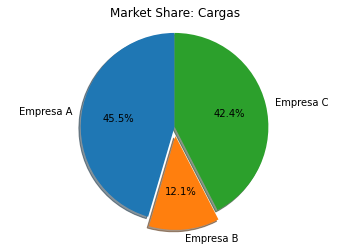

In [16]:
# Market share Cargas
labels = 'Empresa A', 'Empresa B', 'Empresa C'
sizes = [round(market_share.percentual_carga[0], 0),
         round(market_share.percentual_carga[1], 0),
         round(market_share.percentual_carga[2], 0)]
explode = (0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Market Share: Cargas')
plt.show()

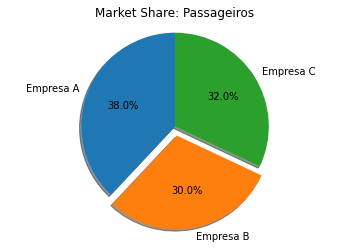

In [17]:
# Market share Passageiros
labels = 'Empresa A', 'Empresa B', 'Empresa C'
sizes = [round(market_share.percentual_pax[0], 0),
         round(market_share.percentual_pax[1], 0),
         round(market_share.percentual_pax[2], 0)]
explode = (0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Market Share: Passageiros')
plt.show()

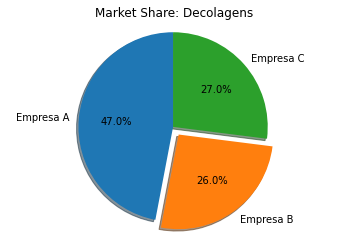

In [18]:
# Market share Decolagens
labels = 'Empresa A', 'Empresa B', 'Empresa C'
sizes = [round(market_share.percentual_decolagens[0], 0),
         round(market_share.percentual_decolagens[1], 0),
         round(market_share.percentual_decolagens[2], 0)]
explode = (0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Market Share: Decolagens')
plt.show()

Com base nos dados e gráficos acima, podemos verificar que a empresa **B** teve o menor market share nas operações de cargas no período de janeiro a outubro de 2021.

# Análise - Parte 2

## Questões direcionadores da análise

1. Como foi a evolução do total de carga transportada por mês por cada empresa?

2. Quais foram as rotas operadas por cada empresa?

2. Quais são as rotas com maior fluxo de carga paga?

2. Qual é a média de carga paga transportada por voo? E como é a distribuição estatística da operação por mês?

## Série histórica

Query para definição de dataframes para análise da série histórica de cada empresa.

In [19]:
serie_hist_a = df[df.empresa == 'A'].groupby(by='mês').sum().sort_values('mês').reset_index()
serie_hist_b = df[df.empresa == 'B'].groupby(by='mês').sum().sort_values('mês').reset_index()
serie_hist_c = df[df.empresa == 'C'].groupby(by='mês').sum().sort_values('mês').reset_index()

Gráficos das séries históricas de `carga_paga_kg`, `decolagens` e `passageiros_pagos`:

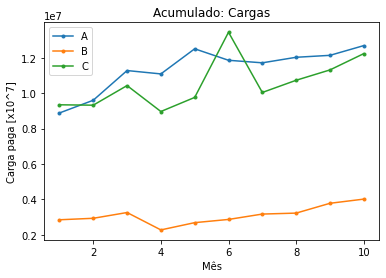

In [20]:
plt.plot(serie_hist_a['mês'], serie_hist_a['carga_paga_kg'], marker='.', label='A')
plt.plot(serie_hist_b['mês'], serie_hist_b['carga_paga_kg'], marker='.', label='B')
plt.plot(serie_hist_c['mês'], serie_hist_c['carga_paga_kg'], marker='.', label='C')
plt.xlabel('Mês')
plt.ylabel('Carga paga [x10^7]')
plt.title('Acumulado: Cargas')
plt.legend()
plt.show()

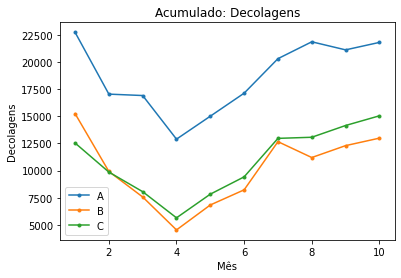

In [21]:
plt.plot(serie_hist_a['mês'], serie_hist_a['decolagens'], marker='.', label='A')
plt.plot(serie_hist_b['mês'], serie_hist_b['decolagens'], marker='.', label='B')
plt.plot(serie_hist_c['mês'], serie_hist_c['decolagens'], marker='.', label='C')
plt.xlabel('Mês')
plt.ylabel('Decolagens')
plt.title('Acumulado: Decolagens')
plt.legend()
plt.show()

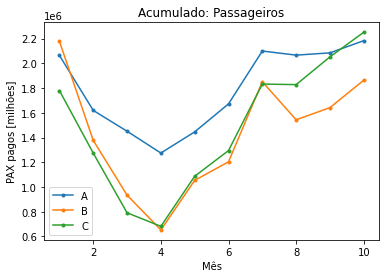

In [22]:
plt.plot(serie_hist_a['mês'], serie_hist_a['passageiros_pagos'], marker='.', label='A')
plt.plot(serie_hist_b['mês'], serie_hist_b['passageiros_pagos'], marker='.', label='B')
plt.plot(serie_hist_c['mês'], serie_hist_c['passageiros_pagos'], marker='.', label='C')
plt.xlabel('Mês')
plt.ylabel('PAX pagos [milhões]')
plt.title('Acumulado: Passageiros')
plt.legend()
plt.show()

Pontos importante que podem ser observados:

* Embora a frequência e operação de passageiros pagos foi decrescente de janeiro a abril, a operação de carga se manteve crescente.

* Em abril de 2021, todas as empresas tiveram um recuo na sua operação doméstica de cargas como na de passageiros. Isso pode ser explicado pelo aumento de casos de Covid-19 com pico em meados de março de 2021.

* Após abril, a operação de passageiros e carga ganha força novamente e se manteve em tendencia crescente.

* Com relação a empresa **B**, podemos ver que sua operação de cargas foi muito menor em comparação com as demais empresas.

## Rotas voadas

Query para identicar as rotas operadas por cada uma das três empresas.

In [23]:
# Rotas únicas
rotas_a = df[df.empresa == 'A'].rota.unique()
rotas_b = df[df.empresa == 'B'].rota.unique()
rotas_c = df[df.empresa == 'C'].rota.unique()

# Número de rotas únicas
num_rotas_a = rotas_a.size
num_rotas_b = rotas_b.size
num_rotas_c = rotas_c.size

Quantidade de rotas:

In [24]:
print('Empresa A: ' + str(num_rotas_a) + ' rotas')
print('Empresa B: ' + str(num_rotas_b) + ' rotas')
print('Empresa C: ' + str(num_rotas_c) + ' rotas')

Empresa A: 783 rotas
Empresa B: 381 rotas
Empresa C: 297 rotas


Verificando as rotas voadas, podemos começar a inferir que a baixa participação no mercado de cargas da empresa **B** pode ser devido ao número de rotas operadas quando comparado com as demais empresas.

## Fluxo ou taxa percentual de carga paga por rota

Analisar o fluxo de carga transportada por rota permite identificar a estratégia das empresas com relação aos aeroportos em que os voos transportam mais cargas.

O fluxo ou taxa percentual de carga paga em uma rota será calculado da seguinte forma:

$$
fluxo\_carga\_percentual_{rota} = \frac{\sum carga\_paga_{rota}}{\sum carga\_paga_{todas\ rotas}}
$$


A query a seguir consolida os dados para avaliação do fluxo de carga paga:

In [25]:
# Queries
fluxo_carga_a = df[df.empresa == 'A'].groupby(by='rota').sum().sort_values('carga_paga_kg', ascending=False).reset_index()
fluxo_carga_b = df[df.empresa == 'B'].groupby(by='rota').sum().sort_values('carga_paga_kg', ascending=False).reset_index()
fluxo_carga_c = df[df.empresa == 'C'].groupby(by='rota').sum().sort_values('carga_paga_kg', ascending=False).reset_index()

# Adição das colunas de fluxo_carga_percentual
fluxo_carga_a['fluxo_carga_percentual'] = round(fluxo_carga_a.carga_paga_kg / fluxo_carga_a.carga_paga_kg.sum() * 100, 1)
fluxo_carga_b['fluxo_carga_percentual'] = round(fluxo_carga_b.carga_paga_kg / fluxo_carga_b.carga_paga_kg.sum() * 100, 1)
fluxo_carga_c['fluxo_carga_percentual'] = round(fluxo_carga_c.carga_paga_kg / fluxo_carga_c.carga_paga_kg.sum() * 100, 1)

Visualizando a tabela preliminar da query para a empresa A:



In [26]:
fluxo_carga_a.head()

,rota,ano,mês,passageiros_pagos,carga_paga_kg,decolagens,carga_por_decolagem,pax_por_decolagem,fluxo_carga_percentual
0,MAOVCP,40420,110,166285.0,16211778.0,1279.0,206325.627653,1898.035132,14.3
1,VCPMAO,40420,110,150758.0,14434231.0,1106.0,197379.650775,1764.216835,12.7
2,VCPREC,36378,99,236349.0,8345222.0,1275.0,96076.698416,2516.242075,7.3
3,VCPBEL,38399,101,96093.0,3058698.0,730.0,98120.962472,1448.588364,2.7
4,RECVCP,40420,110,246021.0,2641721.0,1239.0,28179.802923,2946.798843,2.3


Para considerar apenas as rotas em que houve carga paga transportada:

In [27]:
fluxo_carga_a = fluxo_carga_a[fluxo_carga_a.carga_paga_kg > 0]

In [28]:
fluxo_carga_b = fluxo_carga_b[fluxo_carga_b.carga_paga_kg > 0]

In [29]:
fluxo_carga_c = fluxo_carga_c[fluxo_carga_c.carga_paga_kg > 0]

Agora podemos avaliar as 10 rotas com maior fluxo de carga paga na operação de cada empresa e ter uma ideia de como foi a estratégia adotada.

In [30]:
# Empresa A
fluxo_carga_a[['rota', 'passageiros_pagos', 'carga_paga_kg', 'decolagens', 'fluxo_carga_percentual']].head(10)                                                                                                         


,rota,passageiros_pagos,carga_paga_kg,decolagens,fluxo_carga_percentual
0,MAOVCP,166285.0,16211778.0,1279.0,14.3
1,VCPMAO,150758.0,14434231.0,1106.0,12.7
2,VCPREC,236349.0,8345222.0,1275.0,7.3
3,VCPBEL,96093.0,3058698.0,730.0,2.7
4,RECVCP,246021.0,2641721.0,1239.0,2.3
5,POAVCP,262697.0,2530391.0,2198.0,2.2
6,VIXVCP,122115.0,2242683.0,1475.0,2.0
7,BELMAO,54233.0,2142069.0,507.0,1.9
8,VCPVIX,118512.0,2114304.0,1482.0,1.9
9,GRUREC,205388.0,2042882.0,1403.0,1.8


In [31]:
# Empresa B
fluxo_carga_b[['rota', 'passageiros_pagos', 'carga_paga_kg', 'decolagens', 'fluxo_carga_percentual']].head(10)

,rota,passageiros_pagos,carga_paga_kg,decolagens,fluxo_carga_percentual
0,GRUBSB,163972.0,1082828.0,1189.0,3.5
1,CGHBSB,139755.0,928132.0,1088.0,3.0
2,GRUREC,166898.0,760252.0,1030.0,2.4
3,GRUFOR,153410.0,729613.0,977.0,2.4
4,GRUSSA,160543.0,715733.0,1076.0,2.3
5,BSBGRU,167116.0,510837.0,1183.0,1.6
6,BSBMAO,50952.0,500154.0,352.0,1.6
7,FORGRU,158904.0,469914.0,974.0,1.5
8,RECGRU,174106.0,450201.0,1033.0,1.5
9,FORMAO,52483.0,429344.0,348.0,1.4


In [32]:
# Empresa C
fluxo_carga_c[['rota', 'passageiros_pagos', 'carga_paga_kg', 'decolagens', 'fluxo_carga_percentual']].head(10)

,rota,passageiros_pagos,carga_paga_kg,decolagens,fluxo_carga_percentual
0,GRUMAO,133602.0,17256094.0,1168.0,16.3
1,MAOGRU,140302.0,16280701.0,1130.0,15.4
2,FORGRU,225953.0,3614836.0,1392.0,3.4
3,RECGRU,211268.0,2937169.0,1239.0,2.8
4,GRUSSA,223973.0,2477669.0,1464.0,2.3
5,GRUREC,206398.0,2451814.0,1236.0,2.3
6,GRUFOR,222341.0,2366190.0,1393.0,2.2
7,VCPMAO,0.0,1943914.0,48.0,1.8
8,GRUBSB,195689.0,1895946.0,1415.0,1.8
9,SSAGRU,229701.0,1658147.0,1444.0,1.6


Podemos observar que na operação da **empresa A**, as rotas **MAO-VCP** e **VCP-MAO** representam 27% do seu fluxo total de carga paga sendo as demais rotas menos do que 8%.

A **empresa C** também opera de forma similar, com as rotas **GRU-MAO** e **MAO-GRU** representando 31,7% do seu fluxo total de carga paga e as demais rotas representando menos do que 4%.

Com base nesse dado, podemos verificar que essa duas empresas tem uma estratégia de cargas entre os maiores aeroportos hub do Brasil para entrada e saída de cargas, que são GRU, VCP e MAO.

Já a **empresa B** apresenta um fluxo mais homogêneo, com valor máximo de 3,5% na rota GRU-BSB.

## Distribuição estatística mensal

Essa parte da análise permite entender como está o aproveitamento de transporte de carga por voo. Para isso, vamos definir os dados para análise da distribuição estatística de carga paga transportada por voo em cada mês pelas seguintes queries:

In [33]:
# Empresa A
carga_por_decolagem_a = []
for i in range(1, 11):
    series = df[(df['mês'] == i) & (df.carga_paga_kg > 0) & (df['empresa'] == 'A')].carga_por_decolagem
    carga_por_decolagem_a.append(series)

# Empresa B
carga_por_decolagem_b = []
for i in range(1, 11):
    series = df[(df['mês'] == i) & (df.carga_paga_kg > 0) & (df['empresa'] == 'B')].carga_por_decolagem
    carga_por_decolagem_b.append(series)

# Empresa C
carga_por_decolagem_c = []
for i in range(1, 11):
    series = df[(df['mês'] == i) & (df.carga_paga_kg > 0) & (df['empresa'] == 'C')].carga_por_decolagem
    carga_por_decolagem_c.append(series)

Consolidando os valores de médias:

In [34]:
carga_media_a = []
carga_media_b = []
carga_media_c = []

for mes in range(10):
    carga_media_a.append(round(carga_por_decolagem_a[mes].mean(), 1))

for mes in range(10):
    carga_media_b.append(round(carga_por_decolagem_b[mes].mean(), 1))

for mes in range(10):
    carga_media_c.append(round(carga_por_decolagem_c[mes].mean(), 1))

In [35]:
medias_carga_df = pd.DataFrame({'mes': range(1, 11),
                                'kg_por_voo_a': pd.Series(carga_media_a),
                                'kg_por_voo_b': pd.Series(carga_media_b),
                                'kg_por_voo_c': pd.Series(carga_media_c),})

Agora temos o resultado que buscamos. Médias mensais de carga transportada por voo de cada empresa.

In [36]:
medias_carga_df

,mes,kg_por_voo_a,kg_por_voo_b,kg_por_voo_c
0,1,518.7,200.9,1732.2
1,2,498.6,323.2,1544.7
2,3,606.5,447.4,2158.8
3,4,733.0,474.4,2651.3
4,5,830.6,386.3,1854.3
5,6,535.6,343.7,2304.9
6,7,474.0,262.7,1673.1
7,8,525.3,310.5,1500.5
8,9,432.5,310.8,980.2
9,10,518.9,323.5,1651.7


Verificação dos dados de estatística descritiva sobre as médias mensais de carga transportada por voo.

In [37]:
medias_carga_df[['kg_por_voo_a', 'kg_por_voo_b', 'kg_por_voo_c']].describe()

,kg_por_voo_a,kg_por_voo_b,kg_por_voo_c
count,10.000000,10.000000,10.00000
mean,567.370000,338.340000,1805.17000
std,123.553408,81.192107,469.12425
min,432.500000,200.900000,980.20000
25%,503.625000,310.575000,1571.45000
50%,522.100000,323.350000,1702.65000
75%,588.775000,375.650000,2082.67500
max,830.600000,474.400000,2651.30000


Visualização dos histogramas:

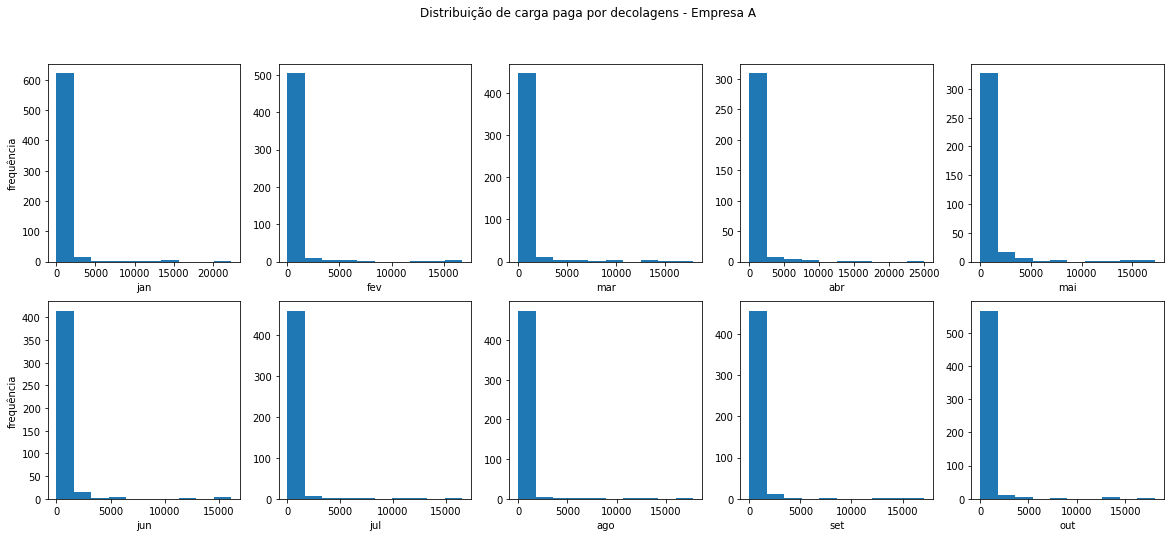

In [38]:
# Empresa A
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Distribuição de carga paga por decolagens - Empresa A')
x_axis = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out']
ax = ax.ravel()
for i, axi in enumerate(ax):
    axi.hist(carga_por_decolagem_a[i])
    axi.set_xlabel(x_axis[i])

ax[0].set_ylabel('frequência')
ax[5].set_ylabel('frequência')
plt.show()

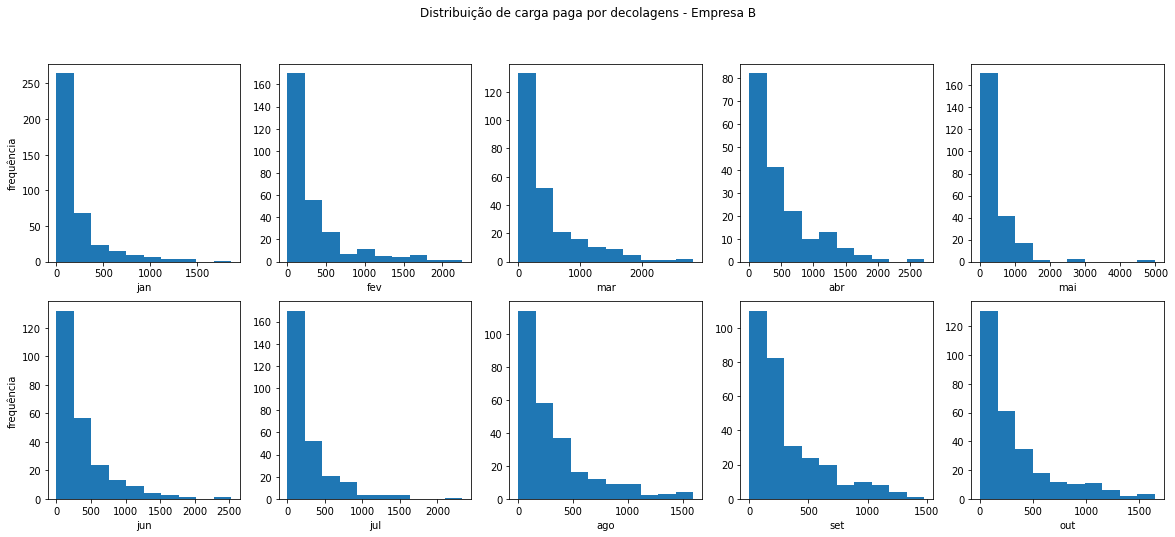

In [39]:
# Empresa B
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Distribuição de carga paga por decolagens - Empresa B')
# x_axis = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out']
ax = ax.ravel()
for i, axi in enumerate(ax):
    axi.hist(carga_por_decolagem_b[i])
    axi.set_xlabel(x_axis[i])

ax[0].set_ylabel('frequência')
ax[5].set_ylabel('frequência')
plt.show()

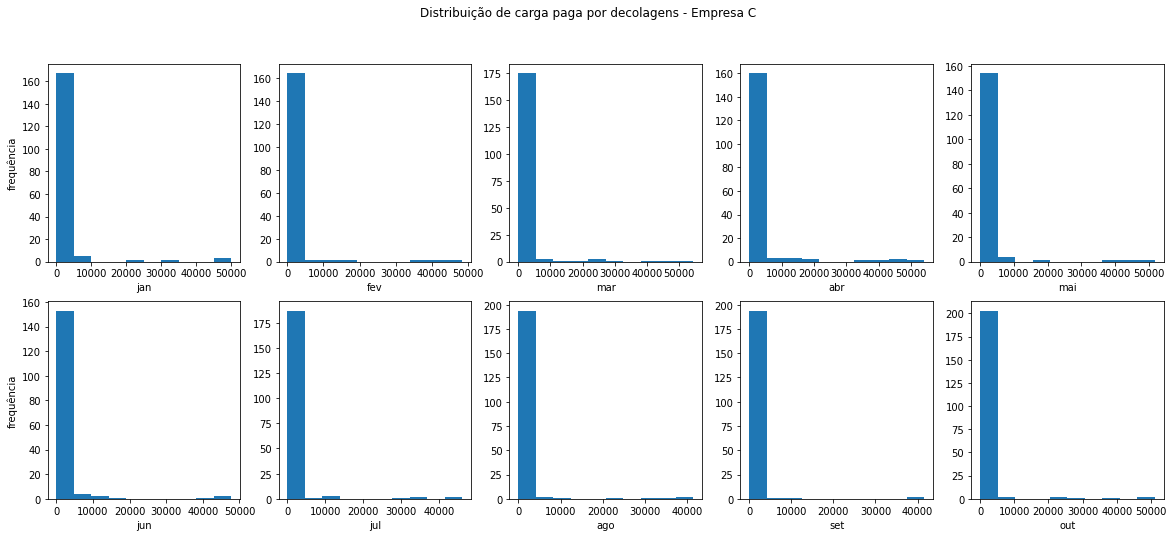

In [40]:
# Empresa C
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Distribuição de carga paga por decolagens - Empresa C')
# x_axis = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out']
ax = ax.ravel()
for i, axi in enumerate(ax):
    axi.hist(carga_por_decolagem_c[i])
    axi.set_xlabel(x_axis[i])

ax[0].set_ylabel('frequência')
ax[5].set_ylabel('frequência')
plt.show()

## Insights

Com base nos dados, podemos identificar as seguintes variáveis estratégicas:
- Aeroportos principais para cargas (GRU, MAO, VCP).
- Frequência de voos entre os aeroportos (GRU, MAO e VCP).
- Taxa de carga transportada por voo.

## Plano de ação para a empresa B
Aumentar disponibilidade de voos para Manaus (MAO)

**Rotas recomendadas:**
- GRU-MAO
- MAO-GRU
- BSB-MAO
- MAO-BSB


**Complementar:**

Estabelecer parceria com empresas de logística para aumentar a taxa de carga por voo.